<a href="https://colab.research.google.com/github/Tyton25/machine_learning/blob/master/sterlings_neural_net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

In [56]:
# X = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0, 17.0, 20.0, 23.0, 26.0, 29.0])
# y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0, 27.0, 30.0, 33.0, 36.0, 39.0])
# y = tf.range(3, 40, 3, dtype=tf.float32)
X = tf.range(-100, 100, 3, dtype=tf.float32)
y = X + 10
# X, y

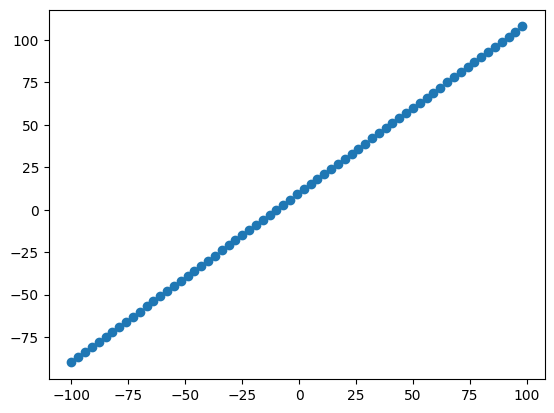

In [57]:
plt.scatter(X,y)

In [170]:
from os import name
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer1"),
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer2"),
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer3"),
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer4"),
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer5"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

model.compile(loss=tf.keras.losses.mae,
              # optimizer=tf.keras.optimizers.SGD(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=1000, verbose=0)
# model.fit(X, y, epochs=100, verbose=0)

In [171]:
model.predict([20.0])

1/1 [==============================] - 0s 78ms/step


array([[29.922186]], dtype=float32)

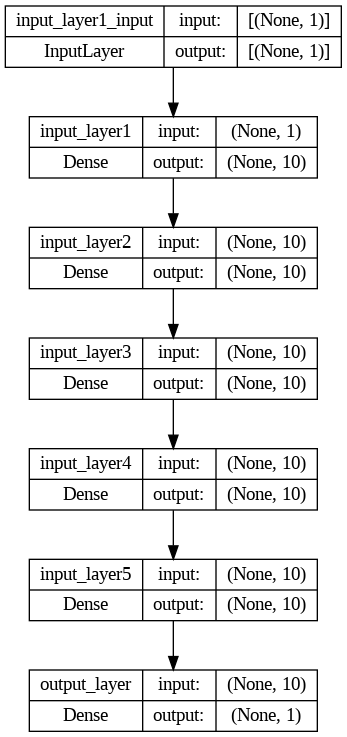

In [172]:
plot_model(model=model, show_shapes=True)

In [173]:
x_length = len(X)
x_length

67

In [174]:
x_idx = int(x_length * 0.8)
x_idx

53

In [175]:
X_train = X[:x_idx]
y_train = y[:x_idx]

In [176]:
X_test = X[x_idx:]
y_test = y[x_idx:]

In [177]:
len(X_train), len(X_test), len(y_train), len(y_test)

(53, 14, 53, 14)

In [178]:
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 20ms/step


array([[ 69.17425 ],
       [ 72.19364 ],
       [ 75.21302 ],
       [ 78.232414],
       [ 81.2518  ],
       [ 84.2712  ],
       [ 87.29059 ],
       [ 90.30996 ],
       [ 93.32936 ],
       [ 96.34875 ],
       [ 99.36816 ],
       [102.38755 ],
       [105.40692 ],
       [108.42631 ]], dtype=float32)

In [179]:
y_test

<tf.Tensor: shape=(14,), dtype=float32, numpy=
array([ 69.,  72.,  75.,  78.,  81.,  84.,  87.,  90.,  93.,  96.,  99.,
       102., 105., 108.], dtype=float32)>

In [180]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):

  plt.figure(figsize=(10,7))

  plt.scatter(train_data, train_labels, c="g", label="Training data")

  plt.scatter(test_data, test_labels, c="b", label="Test data")

  plt.scatter(test_data, predictions, c="r", label="Predictions")

  plt.legend();

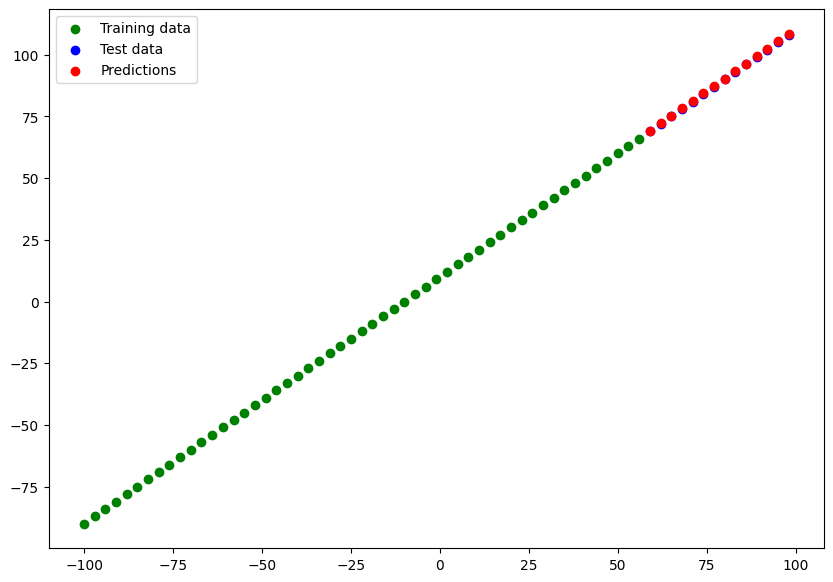

In [218]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

In [182]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 119ms/step - loss: 0.3003 - mae: 0.3003


[0.30027881264686584, 0.30027881264686584]

In [183]:
mae = tf.keras.losses.mae(y_true=y_test,
                          y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=0.3002799>

In [184]:
mse = tf.keras.losses.mse(y_true=y_test,
                          y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=0.09627749>

In [390]:
def mae(test_vals, pred_vals):
  return tf.keras.losses.mae(y_true=test_vals,
                             y_pred=tf.squeeze(pred_vals)).numpy()

In [391]:
def mse(test_vals, pred_vals):
  return tf.keras.losses.mse(y_true=test_vals,
                             y_pred=tf.squeeze(pred_vals)).numpy()

***Buile Model_1

In [347]:
# Set seed
tf.random.set_seed(42)

# 1. Create Model_1 for Evaluation
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile Model_1
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Train Model_1
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

In [348]:
y_pred_1 = model_1.predict(X_test)
y_pred_1

1/1 [==============================] - 0s 38ms/step


array([[ 65.633644],
       [ 68.9011  ],
       [ 72.16856 ],
       [ 75.43602 ],
       [ 78.703476],
       [ 81.97093 ],
       [ 85.23839 ],
       [ 88.505844],
       [ 91.7733  ],
       [ 95.04076 ],
       [ 98.30821 ],
       [101.57567 ],
       [104.84313 ],
       [108.11059 ]], dtype=float32)

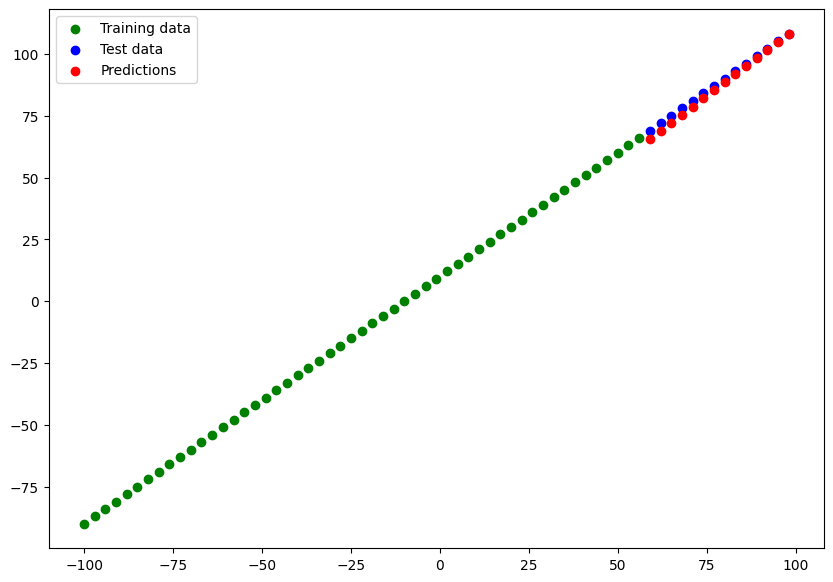

In [349]:
plot_predictions(predictions=y_pred_1)

In [392]:
# Create model_1 evaluation metrics
mae_1 = mae(y_test, y_pred_1)
mse_1 = mse(y_test, y_pred_1)
mae_1, mse_1

(1.6436827, 3.8124232)

** Build `model_2`
* 2 dense layers trained for 100 epochs

In [387]:
# Set seed
tf.random.set_seed(42)

# 1. Create model_2
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

# 2. Compile model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# 3. Train model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=200, verbose=0)

In [388]:
y_pred_2 = model_2.predict(X_test)
y_pred_2

1/1 [==============================] - 0s 44ms/step


array([[ 66.070656],
       [ 69.26244 ],
       [ 72.45424 ],
       [ 75.646034],
       [ 78.83782 ],
       [ 82.02961 ],
       [ 85.221405],
       [ 88.4132  ],
       [ 91.60498 ],
       [ 94.796776],
       [ 97.98858 ],
       [101.18036 ],
       [104.37215 ],
       [107.563934]], dtype=float32)

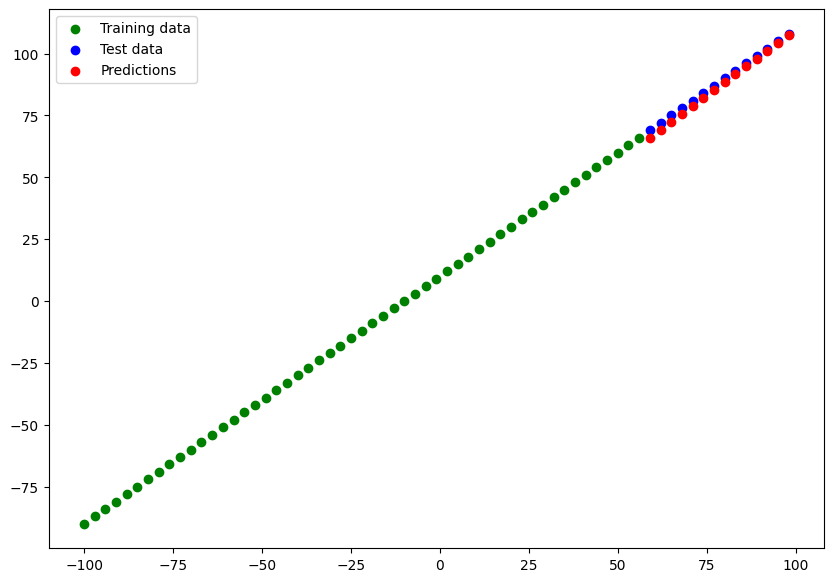

In [389]:
plot_predictions(predictions=y_pred_2)

In [393]:
mae_2 = mae(y_test, y_pred_2)
mse_2 = mse(y_test, y_pred_2)
mae_2, mse_2

(1.6827011, 3.42922)

*** Build `model_3`
* 2 layers trained for 500 epochs

In [369]:
from keras.engine.training import optimizer
# Set seed
tf.random.set_seed(42)

# 1. Create model_3
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

# 2. Compile model_3
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# 3. Train model_3
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0)

In [370]:
y_pred_3 = model_3.predict(X_test)
y_pred_3

1/1 [==============================] - 0s 52ms/step


array([[ 70.95359 ],
       [ 74.26241 ],
       [ 77.571236],
       [ 80.88006 ],
       [ 84.18888 ],
       [ 87.497696],
       [ 90.80652 ],
       [ 94.11533 ],
       [ 97.424164],
       [100.73299 ],
       [104.0418  ],
       [107.350624],
       [110.65945 ],
       [113.96826 ]], dtype=float32)

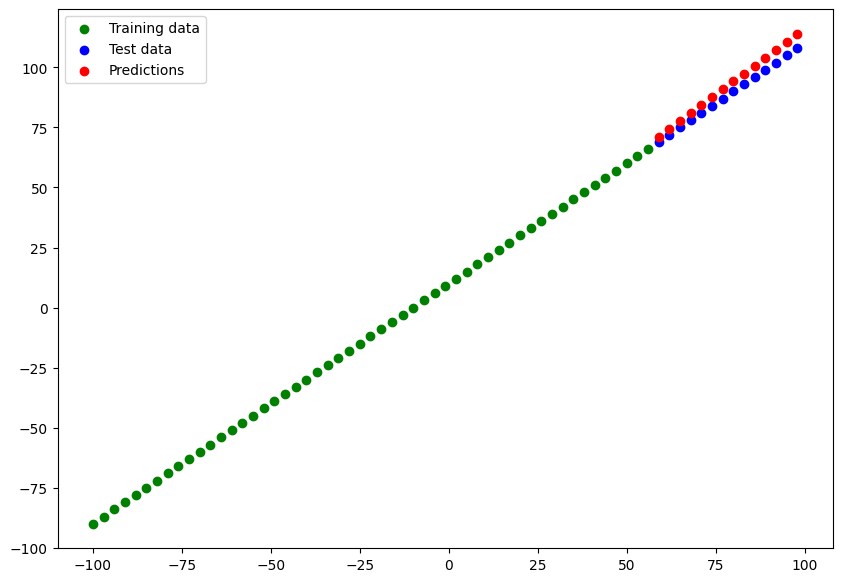

In [371]:
plot_predictions(predictions=y_pred_3)

In [394]:
mae_3 = mae(y_test, y_pred_3)
mse_3 = mse(y_test, y_pred_3)
mae_3, mse_3

(3.9609294, 17.23873)

### Save Models

In [396]:
model_2.save("best_model_SavedModel_format")

*** Compare Results of `Models`

In [397]:
model_2.save("best_model_HDF5_format.h5")

### Load Models

In [399]:
loaded_SavedModel_format = tf.keras.models.load_model("/content/best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_74"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_116 (Dense)           (None, 100)               200       
                                                                 
 dense_117 (Dense)           (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [400]:
model_2.summary()

Model: "sequential_74"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_116 (Dense)           (None, 100)               200       
                                                                 
 dense_117 (Dense)           (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [401]:
# Compare model_2 predictions with that of loaded_SavedModel_format
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 91ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [395]:
import pandas as pd

model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mse_3]
                 ]

results_df = pd.DataFrame(model_results, columns=["Model", "MAE", "MSE"])

results_df

,Model,MAE,MSE
0,model_1,1.643683,3.812423
1,model_2,1.682701,3.429220
2,model_3,3.960929,17.238729


In [ ]:
from google.colab import drive
drive.mount('/content/drive')